# Quick train SBI
Then save the posterior as a pkl using the evaluate module.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# remove top and right axis from plots
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.top"] = False

In [18]:
import sbi
from sbi.inference import SNPE
from sbi.inference.base import infer
from sbi.analysis import pairplot
import torch

In [1]:
# this is necessary to import modules from this repo
import sys
sys.path.append('..')
from src.scripts import evaluate

In [6]:
def simulator(thetas):#, percent_errors):
    # just plop the pendulum within here
    m, b = thetas
    x = np.linspace(0, 100, 101)
    rs = np.random.RandomState()#2147483648)# 
    # I'm thinking sigma could actually be a function of x
    # if we want to get fancy down the road
    sigma = 10
    ε = rs.normal(loc=0, scale=sigma, size = len(x)) 
    return m * x + b + ε

In [9]:
num_dim = 2

low_bounds = torch.tensor([0, -10])
high_bounds = torch.tensor([10, 10])

prior = sbi.utils.BoxUniform(low = low_bounds, high = high_bounds)

In [12]:
posterior = infer(simulator, prior, "SNPE", num_simulations=10000)

Running 10000 simulations.:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 59 epochs.

In [2]:
inference_model = evaluate.InferenceModel()
path = "../savedmodels/sbi/"
model_name = "sbi_linear"
inference_model.save_model_pkl(path, model_name, posterior)

NameError: name 'posterior' is not defined

Test that this worked.

In [13]:
inference_model = evaluate.InferenceModel()
path = "../savedmodels/sbi/"
model_name = "sbi_linear"
posterior = inference_model.load_model_pkl(path, model_name)

../savedmodels/sbi/


Run inference on the posterior.

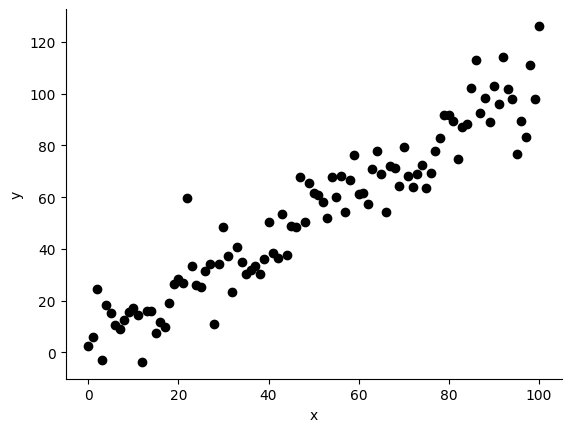

In [11]:
# generate a true dataset
theta_true = [1, 5]
y_true = simulator(theta_true)

# and visualize it
plt.clf()
plt.scatter(np.linspace(0, 100, 101),
            np.array(y_true), color = 'black')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

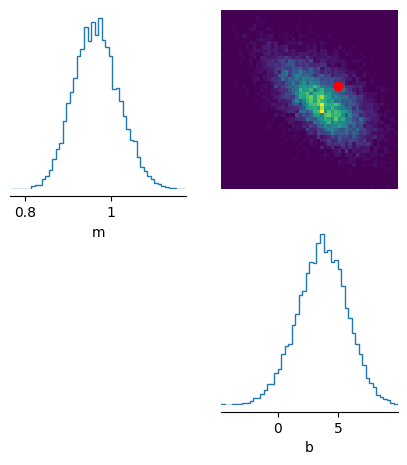

In [19]:
# sample from the posterior
posterior_samples_1 = posterior.sample((10000,), x = y_true)
# that last little part is conditioning on a data value
# plot posterior samples
fig, axes = sbi.analysis.pairplot(
    posterior_samples_1, 
    labels = ['m', 'b'],
    #limits = [[0,10],[-10,10],[0,10]],
    truths = theta_true,
    figsize=(5, 5)
)
axes[0, 1].plot([theta_true[1]], [theta_true[0]], marker="o", color="red")